/Users/evanhosmer/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


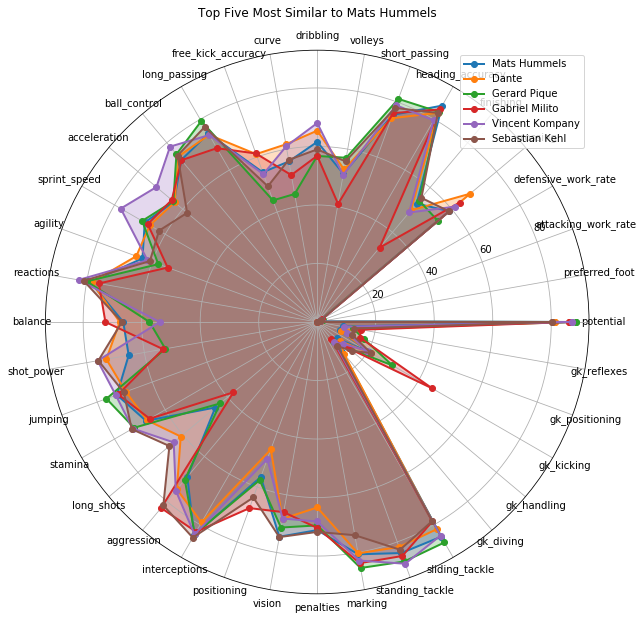

In [34]:
run soccer.py

In [40]:
names = pd.DataFrame(names)
names_df = pd.concat([names,df_mean],axis = 1)

In [43]:
df_test2 = names_df.drop(['potential','preferred_foot','attacking_work_rate','defensive_work_rate'], axis = 1)
df_test3 = df_test2.drop(['volleys','free_kick_accuracy','curve','penalties','balance'], axis = 1)

In [45]:
values = df_test3.drop(['player_name'], axis = 1)
scaler = StandardScaler()
scaler.fit(values)
X = scaler.transform(values)

In [46]:
def scree_plot(pca):
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    cum_var = np.cumsum(vals)
    ax = plt.subplot(111)

    ax.plot(range(len(vals) + 1), np.insert(cum_var, 0, 0), color = 'r', marker = 'o')
    ax.bar(range(len(vals)), vals, alpha = 0.8)
    
    ax.axhline(0.9, color = 'g', linestyle = "--")
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    plt.title("Scree Plot for Soccer Data", fontsize=16)

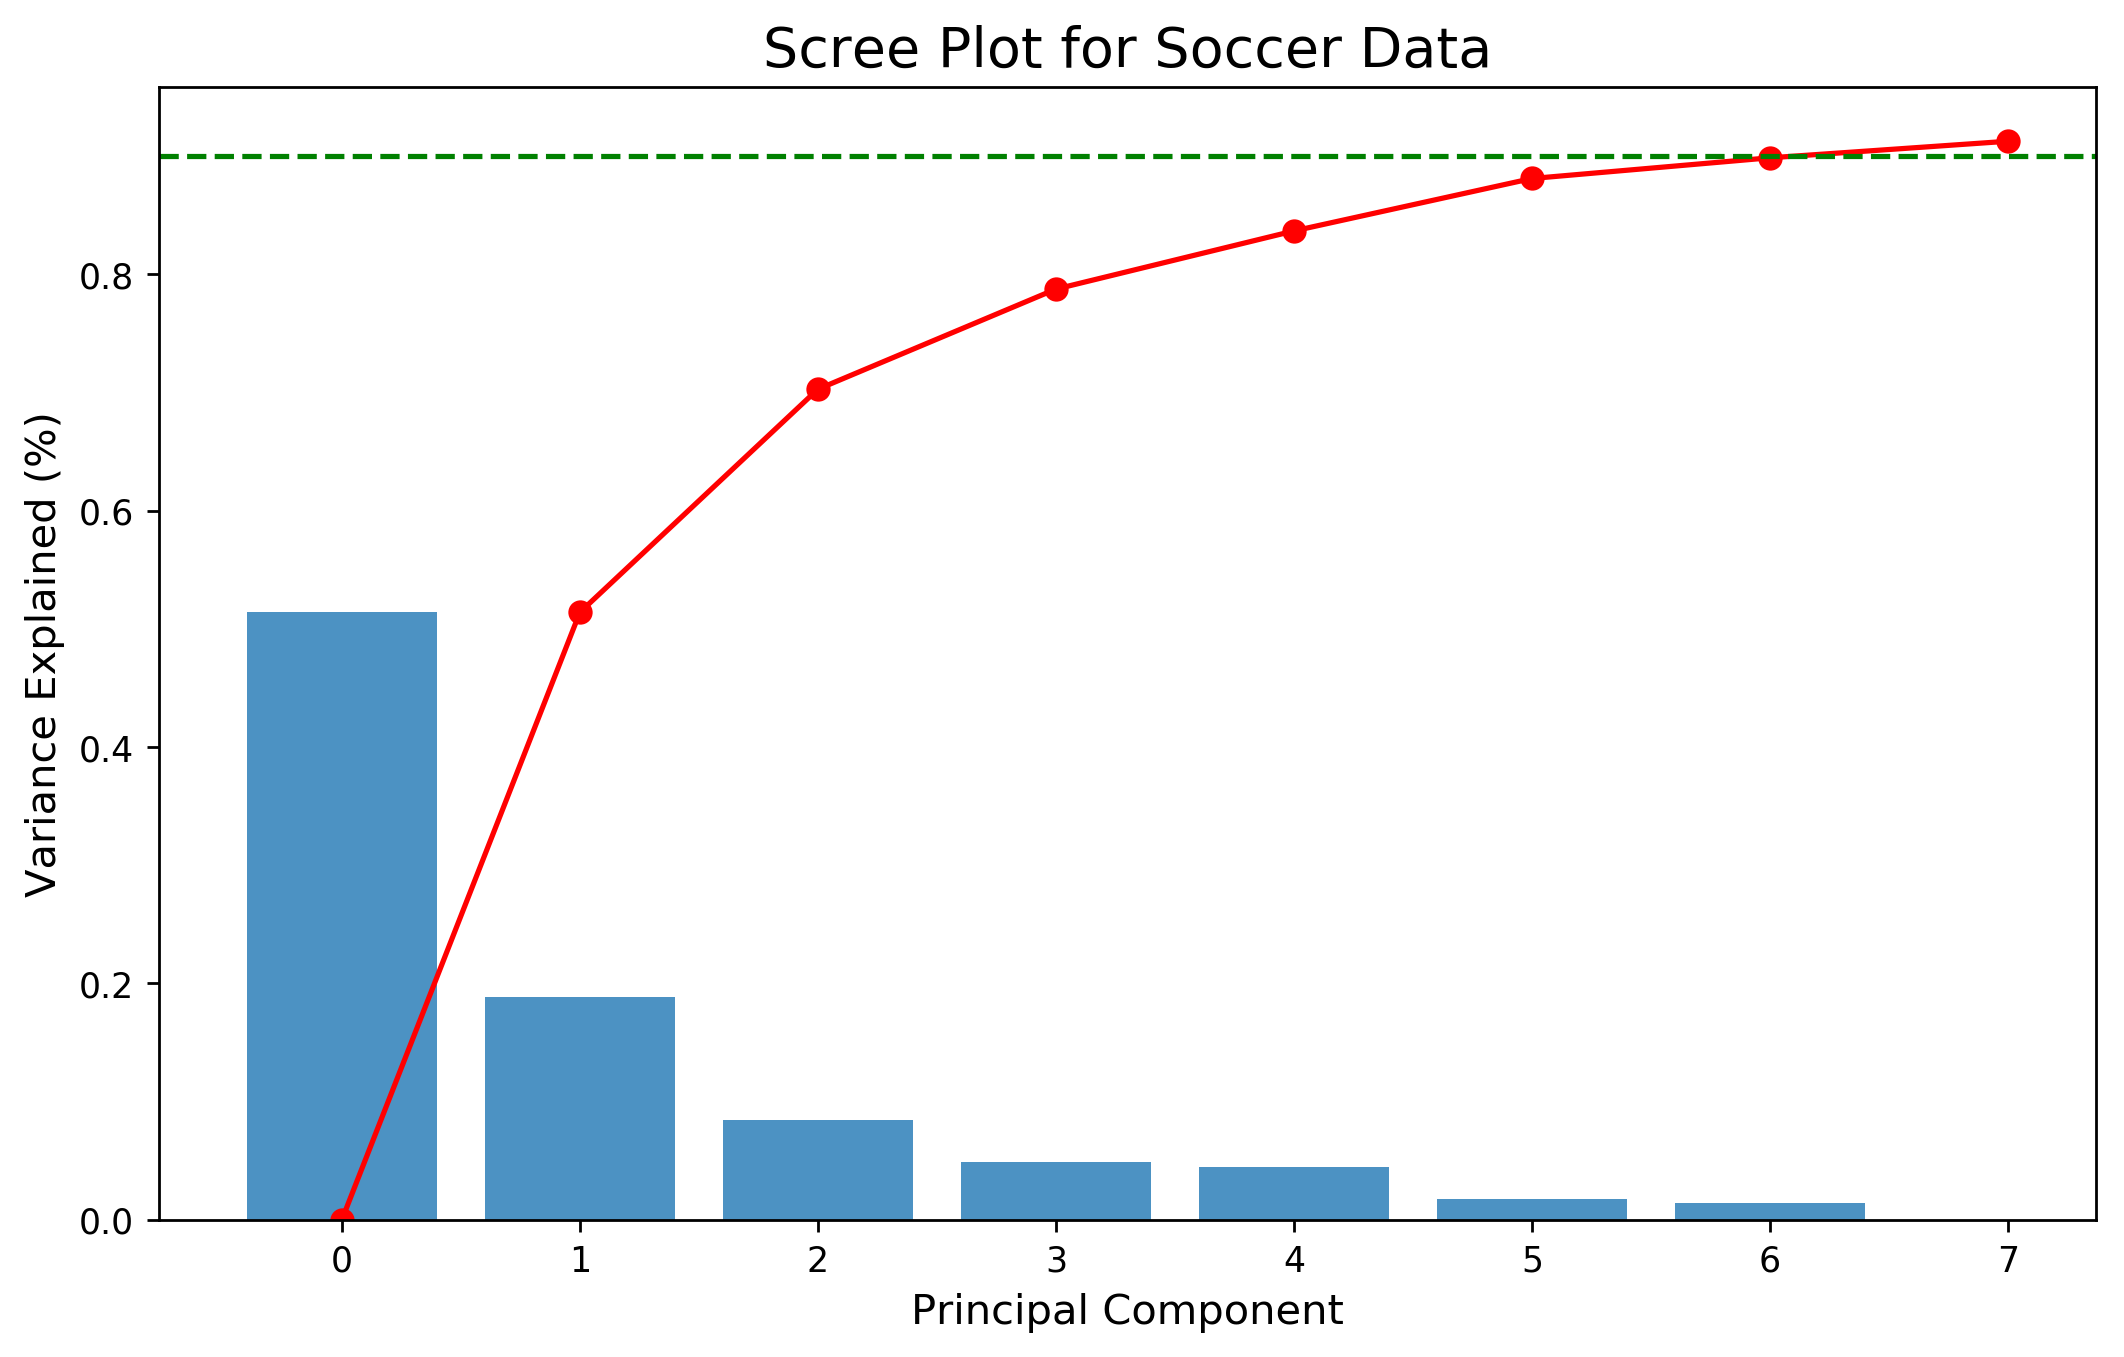

In [47]:
pca = PCA(n_components = 7)
pca.fit(X)
X_pca = pca.transform(X)
scree_plot(pca)

For n_clusters = 2 The average silhouette_score is : 0.6163861204295419


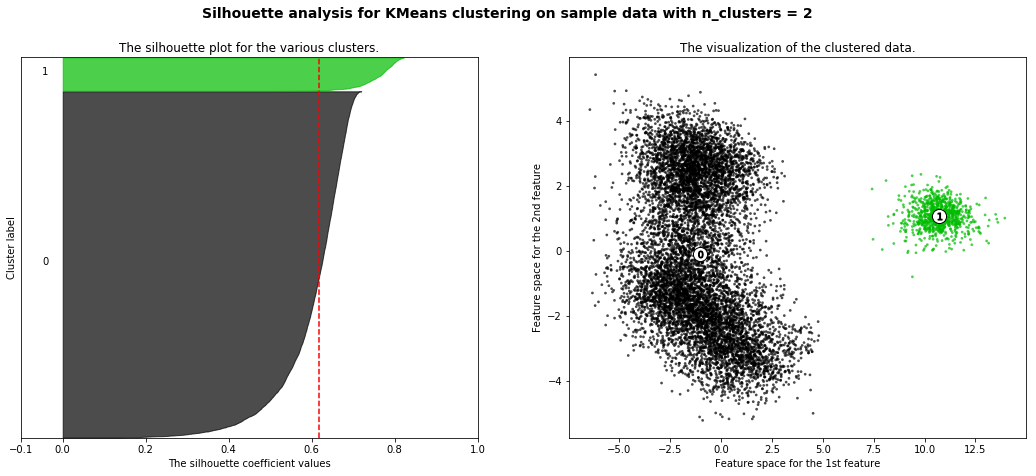

For n_clusters = 3 The average silhouette_score is : 0.3370327976805786


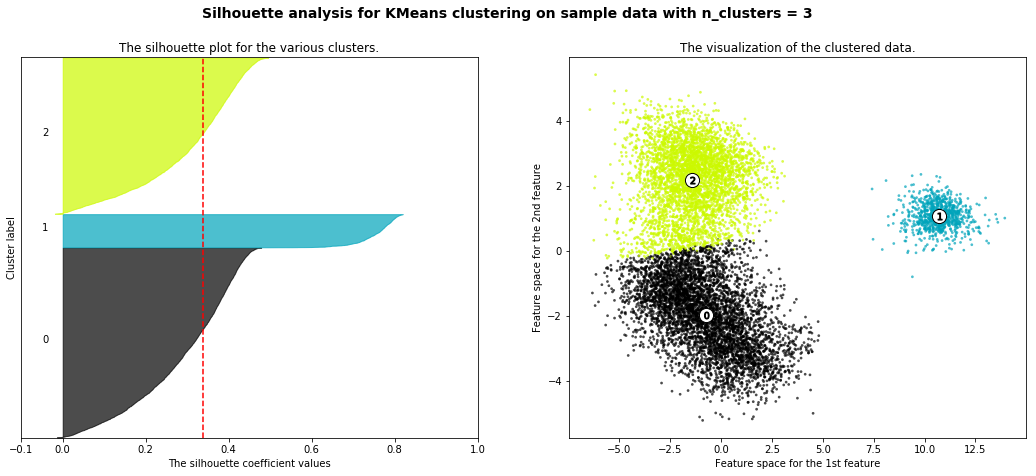

For n_clusters = 4 The average silhouette_score is : 0.3216496972479749


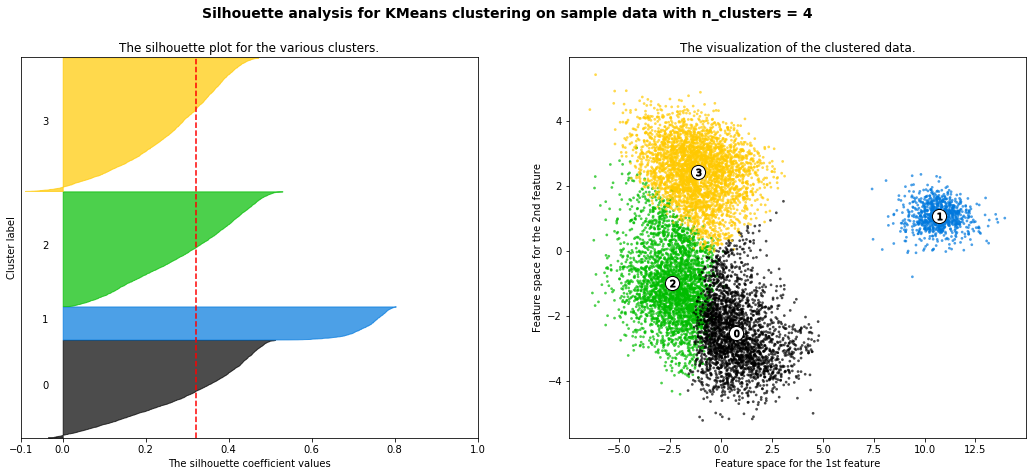

For n_clusters = 5 The average silhouette_score is : 0.2898988444107789


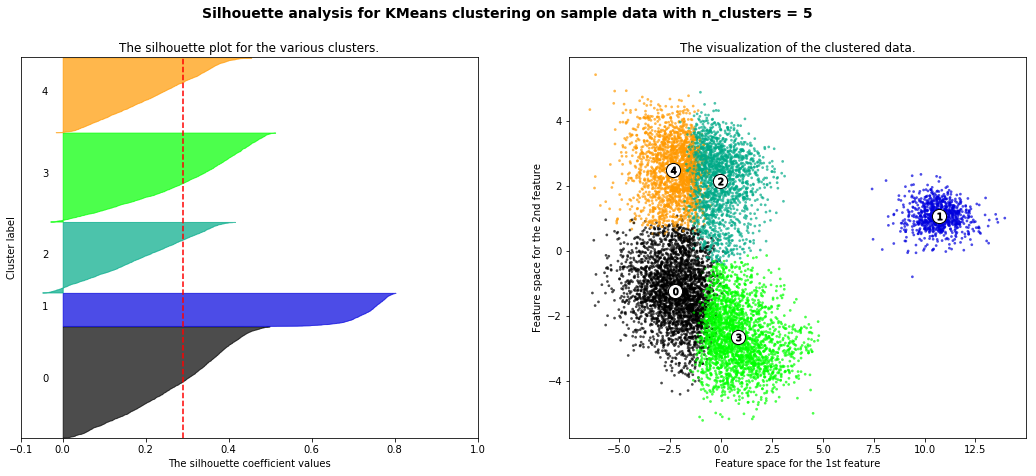

For n_clusters = 6 The average silhouette_score is : 0.24720246988052022


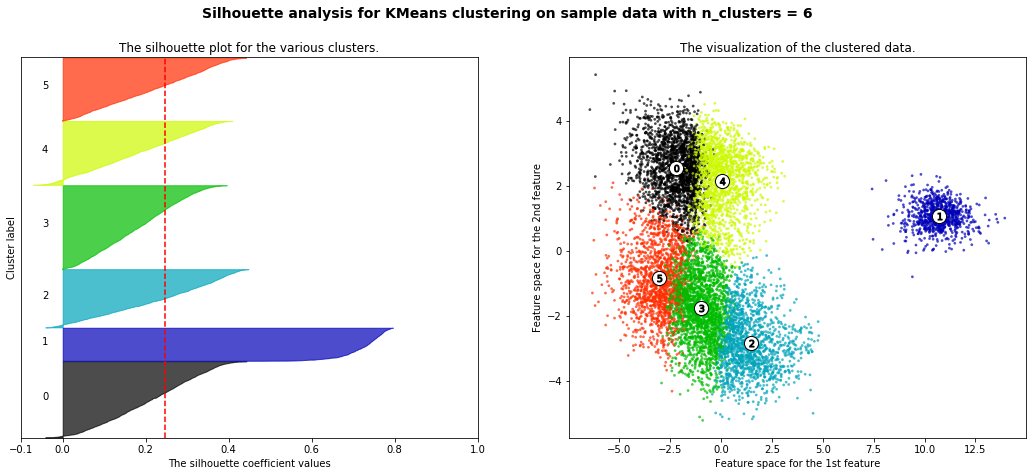

For n_clusters = 7 The average silhouette_score is : 0.24318688861046425


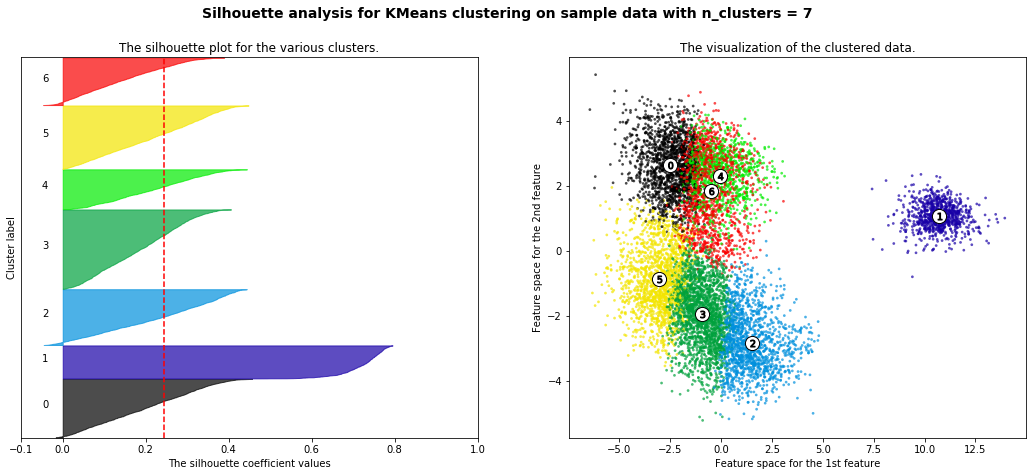

For n_clusters = 8 The average silhouette_score is : 0.2385531127937585


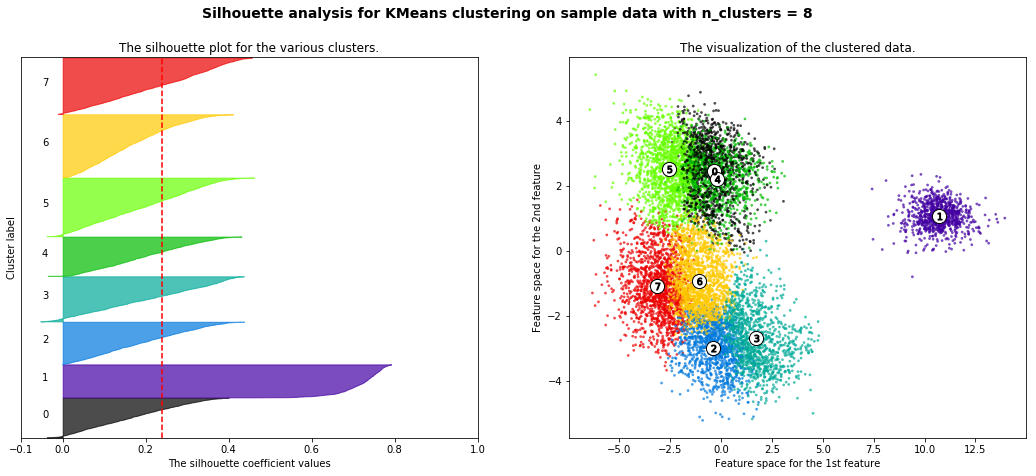

For n_clusters = 9 The average silhouette_score is : 0.23340030226751898


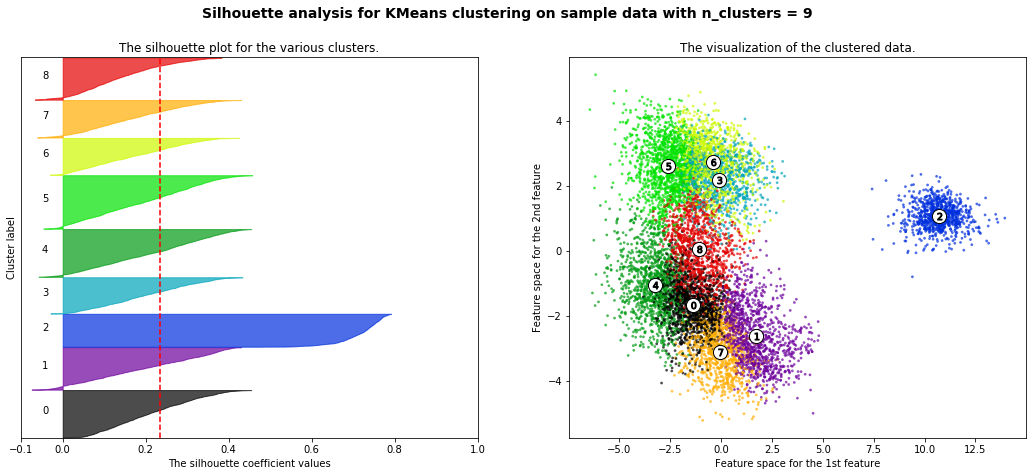

For n_clusters = 10 The average silhouette_score is : 0.23134983464958922


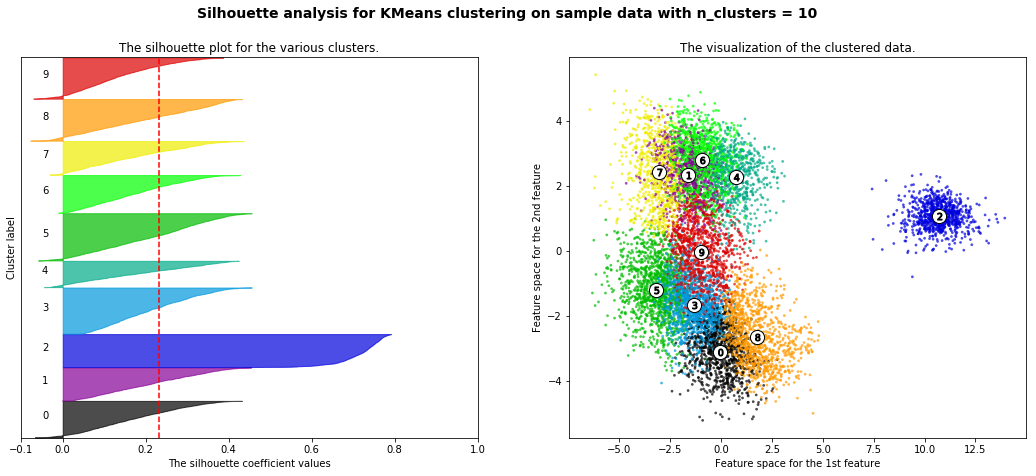

For n_clusters = 11 The average silhouette_score is : 0.22688515499012527


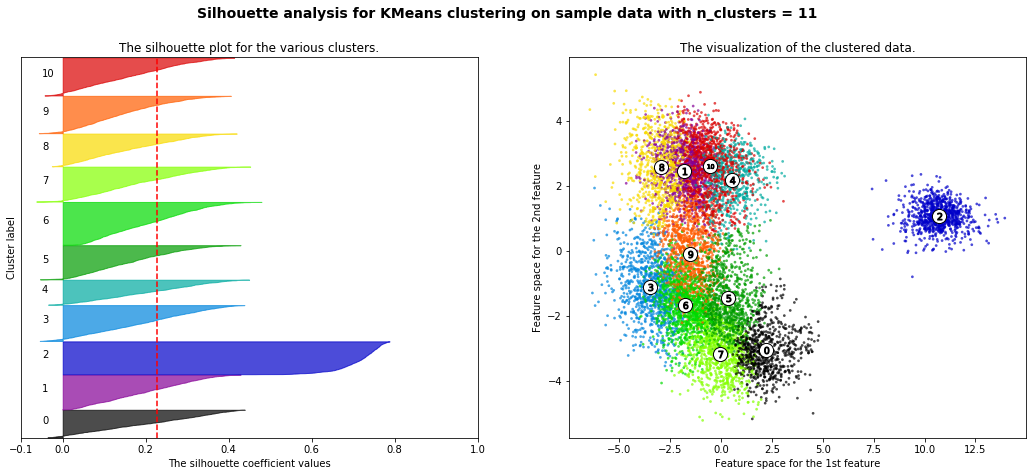

For n_clusters = 12 The average silhouette_score is : 0.19193426064908353


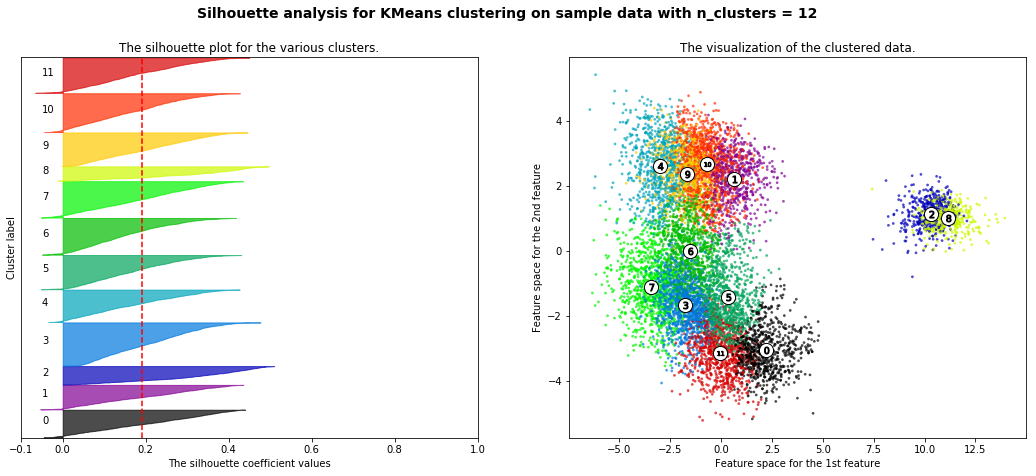

In [17]:
X = X_pca


range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [53]:
scaler = MinMaxScaler()
new_x_norm = scaler.fit_transform(values)

In [54]:
new_x_norm

array([[0.52956298, 0.48475687, 0.44983215, ..., 0.18850715, 0.08165983,
        0.08173568],
       [0.36503856, 0.37175611, 0.79112272, ..., 0.04571666, 0.06713855,
        0.13495122],
       [0.43473293, 0.43289662, 0.68929504, ..., 0.23194044, 0.13673107,
        0.10074123],
       ...,
       [0.50385604, 0.24074074, 0.57571802, ..., 0.10419547, 0.10056488,
        0.03123521],
       [0.3479006 , 0.59611993, 0.55221932, ..., 0.05650401, 0.07755003,
        0.08825186],
       [0.49185947, 0.38977072, 0.52872063, ..., 0.11611833, 0.08905746,
        0.11105853]])

In [127]:
model = NMF(n_components=7, max_iter=250)
model.fit(new_x_norm)
W = model.fit_transform(new_x_norm)
H = model.components_

In [128]:
array = np.argsort(H)

top_fives = []
for idx in range(len(array)):
    top_five = array[idx][-5:]
    top_five_r = top_five[::-1]
    top_fives.append(top_five_r)
    
cols = values.columns
five_names = []
for idx in range(len(top_fives)):
    arr = top_fives[idx]
    names = []
    five_names.append(names)
    for val in arr:
        name = cols[val]
        names.append(name)
        
five_names

[['long_shots', 'crossing', 'vision', 'dribbling', 'positioning'],
 ['gk_handling', 'gk_reflexes', 'gk_diving', 'gk_kicking', 'gk_positioning'],
 ['standing_tackle',
  'marking',
  'sliding_tackle',
  'interceptions',
  'heading_accuracy'],
 ['acceleration', 'sprint_speed', 'agility', 'stamina', 'jumping'],
 ['heading_accuracy', 'finishing', 'shot_power', 'jumping', 'long_shots'],
 ['aggression', 'stamina', 'reactions', 'interceptions', 'positioning'],
 ['jumping', 'long_passing', 'vision', 'short_passing', 'agility']]

In [150]:
test_df = pd.DataFrame(five_names)
test_df['assigned_label'] = ['Advanced Playmaker', 'Goalkeeper','Defenders','Wingers/Wingbacks','Strikers/Target Forwards',
                             'Holding Midfielder','Box to Box Midfielder/Fullback']
test_df.columns = ['feature_1','feature_2','feature_3','feature_4','feature_5','assigned_label']
test_df

,feature_1,feature_2,feature_3,feature_4,feature_5,assigned_label
0,long_shots,crossing,vision,dribbling,positioning,Advanced Playmaker
1,gk_handling,gk_reflexes,gk_diving,gk_kicking,gk_positioning,Goalkeeper
2,standing_tackle,marking,sliding_tackle,interceptions,heading_accuracy,Defenders
3,acceleration,sprint_speed,agility,stamina,jumping,Wingers/Wingbacks
4,heading_accuracy,finishing,shot_power,jumping,long_shots,Strikers/Target Forwards
5,aggression,stamina,reactions,interceptions,positioning,Holding Midfielder
6,jumping,long_passing,vision,short_passing,agility,Box to Box Midfielder/Fullback


```
My Labels:

1) Advanced Playmaker
2) Goalkeepers
3) Defenders
4) Wingers
5) Strikers/Target Forwards
6) Holding Midfielder
7) Box to Box Midfielder

```

In [60]:
namelist = names_df['player_name']

In [158]:
names_df[names_df['player_name'] == 'Alexis Sanchez']

,player_name,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
3929,Alexis Sanchez,87.171429,1.0,2.0,1.942857,75.228571,78.628571,61.2,77.2,75.428571,...,76.285714,72.857143,31.371429,40.771429,39.4,9.771429,11.885714,24.857143,13.542857,14.371429


In [159]:
W[3929]

array([0.17065492, 0.0202077 , 0.03781969, 0.14550515, 0.10145479,
       0.08912393, 0.13089659])

In [ ]:
ax.barh(y, x, align='center',
        color='green', ecolor='black')
ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
ax.set_xlim(75,100)
ax.invert_yaxis()
ax.set_xlabel('Overall Rating')
ax.set_title('10 best players by overall rating')

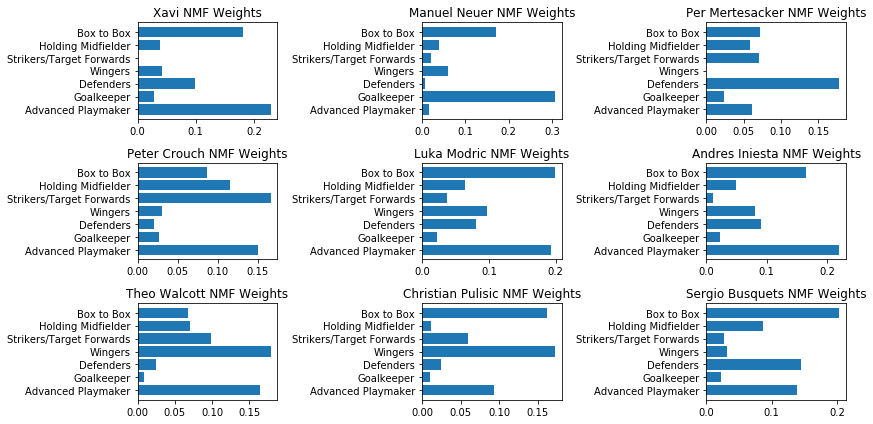

In [124]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(331)

x = ['Advanced Playmaker', 'Goalkeeper','Defenders','Wingers','Strikers/Target Forwards','Holding Midfielder','Box to Box']
y = W[3095]

ax.barh(x,y)
ax.set_title('Xavi NMF Weights')

ax2 = fig.add_subplot(332)

y2 = W[1232]
ax2.barh(x,y2)
ax2.set_title('Manuel Neuer NMF Weights')

ax3 = fig.add_subplot(333)

y3 = W[2284]
ax3.barh(x,y3)
ax3.set_title('Per Mertesacker NMF Weights')

ax4 = fig.add_subplot(334)

y4 = W[1593]
ax4.barh(x,y4)
ax4.set_title('Peter Crouch NMF Weights')

ax5 = fig.add_subplot(335)

y5 = W[1714]
ax5.barh(x,y5)
ax5.set_title('Luka Modric NMF Weights')

ax6 = fig.add_subplot(336)

y6 = W[1669]
ax6.barh(x,y6)
ax6.set_title('Andres Iniesta NMF Weights')

ax7 = fig.add_subplot(337)

y7 = W[1699]
ax7.barh(x,y7)
ax7.set_title('Theo Walcott NMF Weights')

ax8 = fig.add_subplot(338)

y8 = W[9878]
ax8.barh(x,y8)
ax8.set_title('Christian Pulisic NMF Weights')

ax9 = fig.add_subplot(339)

y9 = W[5688]
ax9.barh(x,y9)
ax9.set_title('Sergio Busquets NMF Weights')

plt.tight_layout()
